In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (8125, 23)
Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [2]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [3]:
def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

def knn_predict(X_train, y_train, x_test, k=5):
    distances = []
    for i in range(len(X_train)):
        dist = hamming_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    most_common = Counter(k_nearest).most_common(1)[0][0]
    return most_common


In [4]:
k = 5
y_pred = [knn_predict(X_train, y_train, x, k=k) for x in X_test]

acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (k={k}):", acc)

KNN Accuracy (k=5): 1.0


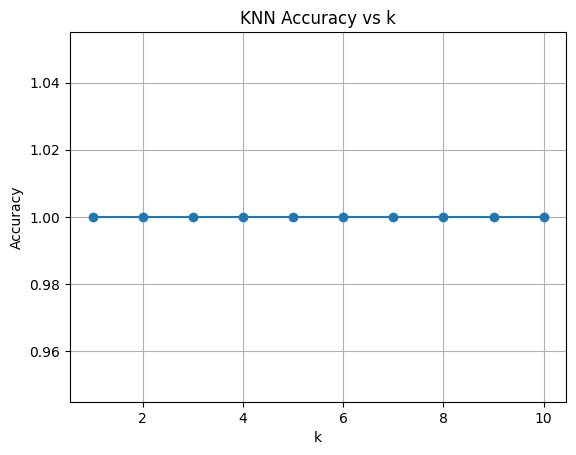

In [5]:
k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    preds = [knn_predict(X_train, y_train, x, k=k) for x in X_test]
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
